In [1]:
#* for data manipulation 
import pandas as pd 
import numpy as np 

from disk_analysis_tools import tiling_disk_plots as tdp
from disk_analysis_tools import tiling_disk_utils as tdu

#* for plotting: 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks")
sns.set_context("talk")

from pathlib import Path
from pathlib import Path
measurement_folder  = Path.cwd().parent / 'excel_data'

In [2]:
coord_data_edges = pd.read_excel(measurement_folder/'coords_xy_edges_verticies.xlsx', sheet_name='coordinates')
coord_data_edges.arm_label = coord_data_edges.arm_label.astype("str") #? some numbers are typed int32 isntead of str

data import

In [3]:
microscope_data_file = measurement_folder/'mikriskop_gap_steeldisk_01_data.xlsx'

vertex_front = pd.read_excel(microscope_data_file, sheet_name='vertex_front')
edge_horizontal_front = pd.read_excel(microscope_data_file, sheet_name='horizontal_front')
edge_vertical_front = pd.read_excel(microscope_data_file, sheet_name='vertical_front')

vertex_back = pd.read_excel(microscope_data_file, sheet_name='vertex_back')
edge_vertical_back = pd.read_excel(microscope_data_file, sheet_name='vertical_back')
edge_horizontal_back = pd.read_excel(microscope_data_file, sheet_name='horizontal_back')


## front

preprocessing front face data

In [63]:
df_front.head()

,location,arm_label,front_back,gap_relative,plane_difference,glue_width,arm_type,x,y,adj_x1,adj_y1,dist_1,adj_x2,adj_y2,dist_2,label_1,label_2
0,NaN,19_8,front,-29.358,-49.861,1001.235,horizontal,-114.233,28.266,-97.878,18.829,18.882346,-130.504,37.681,18.798608,6,h12
1,NaN,19_2,front,-11.788,18.506,1055.205,horizontal,-81.595,28.266,-65.252,37.681,18.860962,-97.878,18.829,18.820017,7,6
2,NaN,18_19,front,-2.992,49.575,954.741,horizontal,-81.595,84.798,-65.252,75.339,18.882964,-97.878,94.191,18.797993,1,h1
3,NaN,18_7,front,-32.231,-3.821,881.854,horizontal,-48.957,84.798,-32.626,94.191,18.839586,-65.252,75.339,18.841436,2,1
4,NaN,17_7,front,-38.763,-0.241,940.619,horizontal,-16.319,84.798,0.0,75.339,18.862196,-32.626,94.191,18.818786,3,2


In [4]:
df_front = pd.concat([edge_horizontal_front, edge_vertical_front], axis=0,)
df_front = pd.merge(df_front, coord_data_edges) 
df_front.drop(columns='line_type', inplace=True)
coords_for_front_df = tdu.add_adjecent_points(df_front, coord_data_edges)
df_front = pd.merge(df_front, coords_for_front_df)

front width and depth map

(<Figure size 864x864 with 2 Axes>,
 <AxesSubplot:title={'center':'Steeldisk gap data front'}, xlabel='x [mm]', ylabel='y [mm]'>)

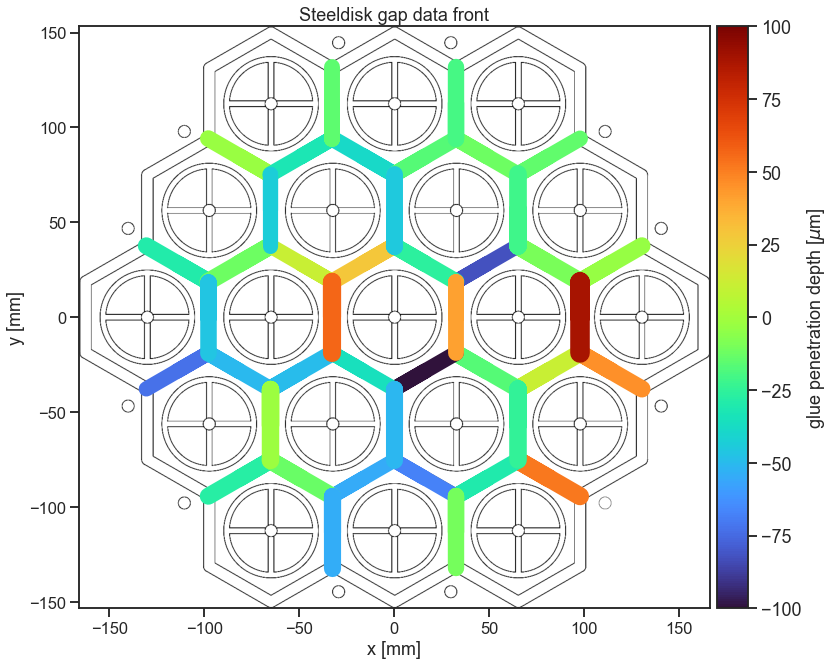

In [35]:
def lw_repr(width, norm_width=300): return 10* (np.log(width/norm_width)+0.5)
tdp.plot_microscope_glue_canals(df_front,
                                lw_repr=lw_repr,
                                title='Steeldisk gap data front')

histograms of width & depth 

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Steeldisk gap penetration depth - front '}, xlabel='glue penetration depth [µm]', ylabel='Count'>)

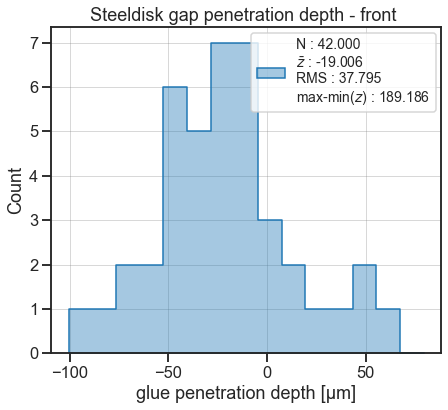

In [36]:
plot_bins = np.arange(df_front.gap_relative.min(), df_front.gap_relative.max(), 12)
tdp.ts_hist(df_front,
            mode='gap_relative',
            x_label='glue penetration depth',
            plot_bins=plot_bins,
            title='Steeldisk gap penetration depth - front '
            )

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Steeldisk glue width - front '}, xlabel='glue width [µm]', ylabel='Count'>)

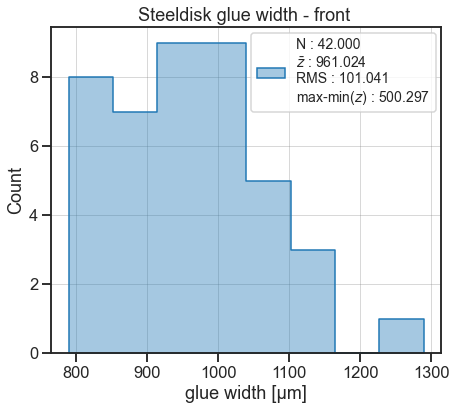

In [38]:
plot_bins = np.arange(df_front.glue_width.min(), df_front.glue_width.max(), 12)
tdp.ts_hist(df_front, mode='glue_width', x_label='glue width',
            title='Steeldisk glue width - front ')

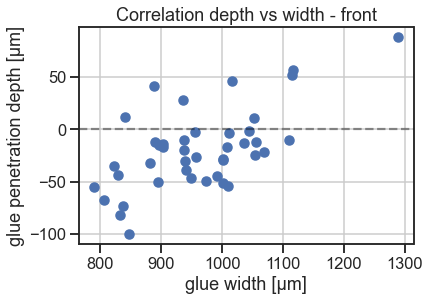

In [52]:
plt.scatter(df_front.glue_width, df_front.gap_relative)
plt.grid(True)
plt.xlabel('glue width [µm]')
plt.ylabel('glue penetration depth [µm]')
plt.title('Correlation depth vs width - front')
ax = plt.gca()
ax.axhline(0,ls='--', c='black', alpha=0.4)

-> glue width was about 800µm for the blue tip & velocity of 4.0mm/s with on the triplets \n
-> glue penetration depth was also closer to 0 with this velocity

## back side

preprocessing back 

In [8]:
df_back = pd.concat([edge_horizontal_back, edge_vertical_back], axis=0,)
df_back = pd.merge(df_back, coord_data_edges) 
df_back.drop(columns='line_type', inplace=True)
coords_for_back_df = tdu.add_adjecent_points(df_back, coord_data_edges)
df_back = pd.merge(df_back, coords_for_back_df)

back map width & depth 

(<Figure size 864x864 with 2 Axes>,
 <AxesSubplot:title={'center':'Steeldisk gap data back side'}, xlabel='x [mm]', ylabel='y [mm]'>)

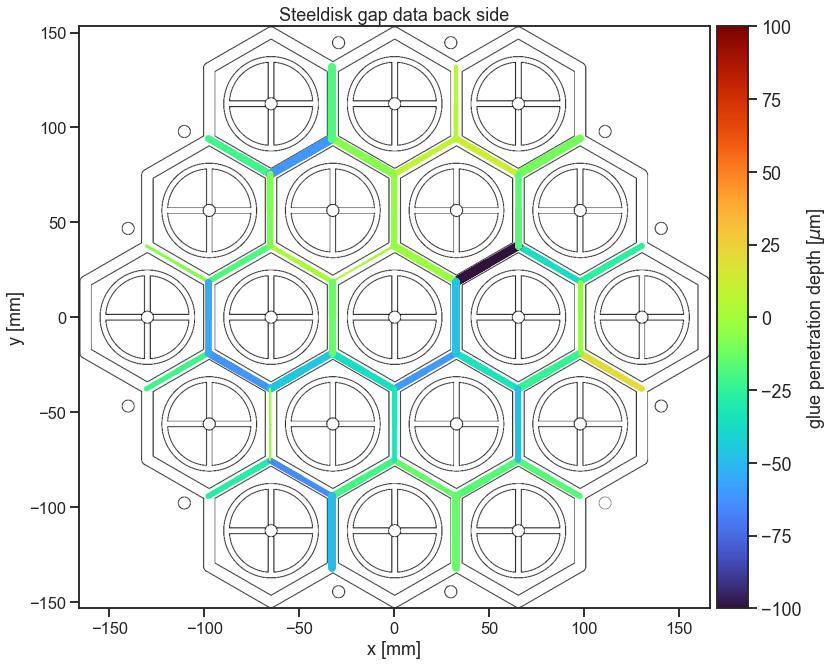

In [9]:

def lw_repr(width, norm_width=300): return 10* (np.log(width/norm_width)+0.5)
tdp.plot_microscope_glue_canals(df_back,
                                lw_repr = lw_repr,
                                title='Steeldisk gap data back side')

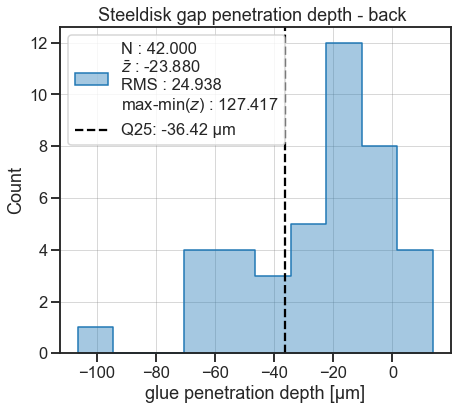

In [59]:
plot_bins = np.arange(df_back.gap_relative.min(), df_back.gap_relative.max(), 12)
tdp.ts_hist(df_back, mode='gap_relative',
            x_label='glue penetration depth',
            plot_bins=plot_bins,
            title='Steeldisk gap penetration depth - back ')
ax = plt.gca()
Q25 = np.round(df_back.gap_relative.quantile(0.25), 2)
ax.axvline(Q25, c='black', ls='--', label=f'Q25: {Q25} µm')
plt.legend(loc='upper left')

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Steeldisk gap penetration depth - back '}, xlabel='glue width [µm]', ylabel='Count'>)

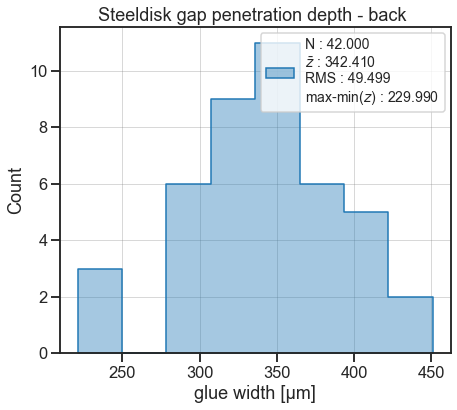

In [60]:
plot_bins = np.arange(df_back.glue_width.min(), df_back.glue_width.max(), 12)
tdp.ts_hist(df_back, mode='glue_width', x_label='glue width',
            title='Steeldisk gap penetration depth - back ')

vertex front

In [12]:
c_vertex_front = vertex_front.drop(columns=['plane_difference', 'glue_width', 'arm_label'])
c_vertex_front.rename(columns={'location': 'arm_label'}, inplace=True)
c_vertex_front.arm_label = c_vertex_front.arm_label.astype("str")

In [15]:
c_vertex_front = pd.merge(c_vertex_front, coord_data_edges)

(<Figure size 864x864 with 2 Axes>,
 <AxesSubplot:title={'center':'Vertex depth front - depth measured against bulk'}, xlabel='x [mm]', ylabel='y [mm]'>)

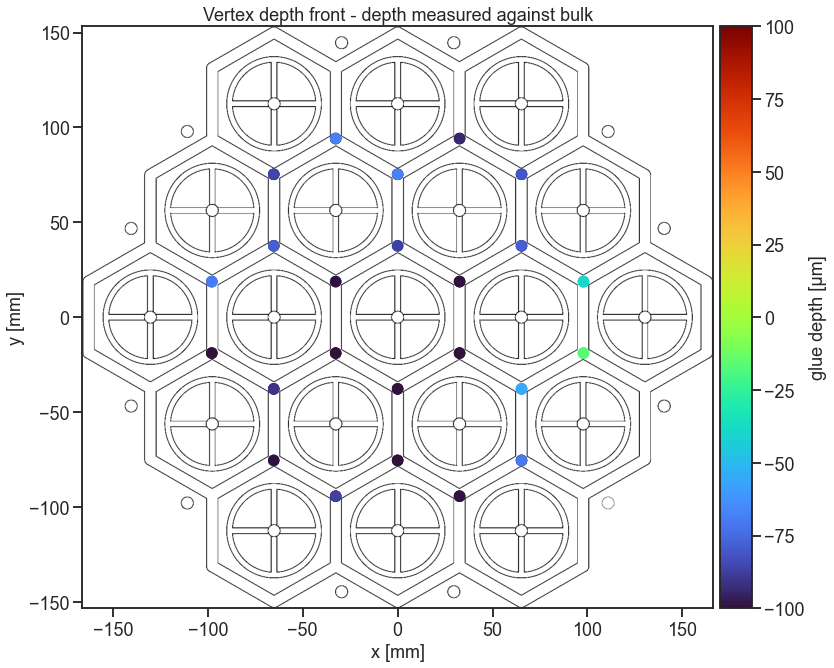

In [19]:
tdp.full_hexagon_plot(c_vertex_front, mode='gap_relative', size=10**2,
                      title='Vertex depth front - depth measured against bulk',
                      cbar_title='glue depth'
                      )

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Vertex front glue depth - \n depth measured against bulk'}, xlabel='glue penetration depth [µm]', ylabel='Count'>)

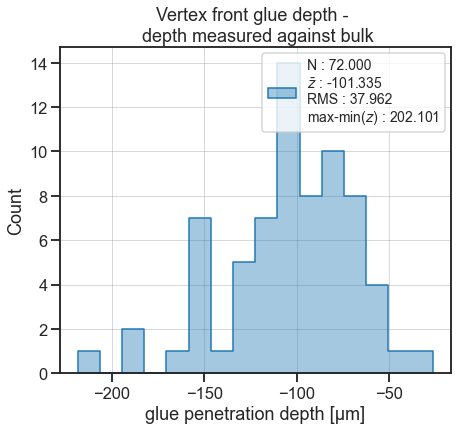

In [24]:
plot_bins = np.arange(c_vertex_front.gap_relative.min(), c_vertex_front.gap_relative.max(), 12)
tdp.ts_hist(c_vertex_front,
            mode='gap_relative',
            x_label='glue penetration depth',
            plot_bins=plot_bins,
            title='Vertex front glue depth - \n depth measured against bulk')

vertex back

In [26]:
c_vertex_back = vertex_back.drop(columns=['arm_label'])
c_vertex_back.rename(columns={'location': 'arm_label'}, inplace=True)
c_vertex_back.arm_label = c_vertex_back.arm_label.astype("str")

In [27]:
c_vertex_back = pd.merge(c_vertex_back, coord_data_edges)

(<Figure size 864x864 with 2 Axes>,
 <AxesSubplot:title={'center':'Vertex depth back'}, xlabel='x [mm]', ylabel='y [mm]'>)

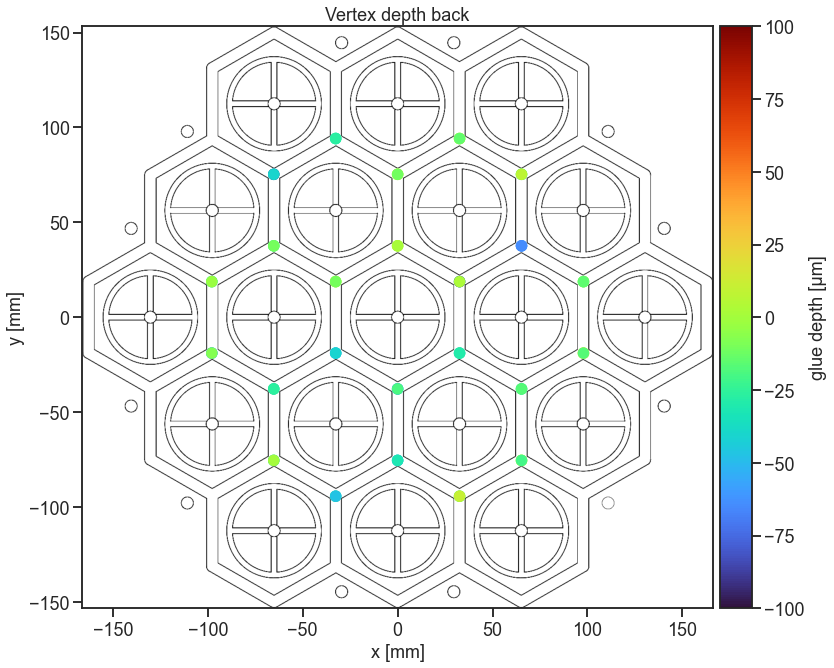

In [28]:
tdp.full_hexagon_plot(c_vertex_back, mode='gap_relative', size=10**2,
                      title='Vertex depth back',
                      cbar_title='glue depth'
                      )

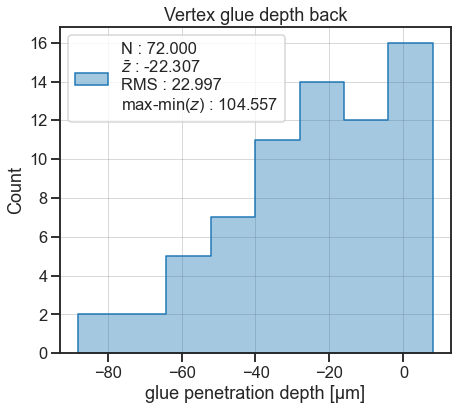

In [62]:
plot_bins = np.arange(c_vertex_back.gap_relative.min(), c_vertex_back.gap_relative.max(), 12)
tdp.ts_hist(c_vertex_back,
            mode='gap_relative',
            x_label='glue penetration depth',
            plot_bins=plot_bins,
            title='Vertex glue depth back')
plt.legend(loc='upper left')

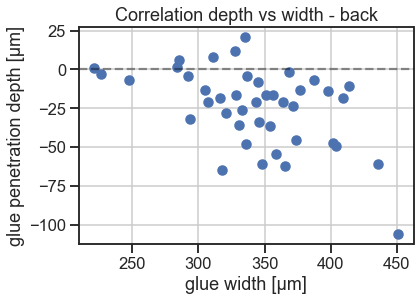

In [64]:
plt.scatter(df_back.glue_width, df_back.gap_relative)
plt.grid(True)
plt.xlabel('glue width [µm]')
plt.ylabel('glue penetration depth [µm]')
plt.title('Correlation depth vs width - back')
ax = plt.gca()
ax.axhline(0,ls='--', c='black', alpha=0.4)